In [2]:
import cv2
from matplotlib import pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import numpy as np
from PIL import Image
from PIL import ImageFilter
from matplotlib import animation
from PIL import ImageEnhance

from tkinter import filedialog
import tkinter as tk

import pickle

from os import sys

import matplotlib.pyplot as plt
import argparse

from statistics import mean
import os

%matplotlib inline

# for loading array 
from scipy.interpolate import interp1d
from scipy.io import loadmat
from scipy import signal as sig
import pandas as pd
import numpy as np
from scipy.signal import filtfilt, butter


sys.path.append(r'C:\Users\Nicolas\Documents\GitHub\WorkScripts')

from LibrairieNico.HitsFctClass import smooth, calculateNewSize


[ 195  259  316  351  388  423  451  478  511  539  568  596  639  677
  724  764  793  823  849  879  910  934  962  992 1022 1053 1079 1110
 1143 1174 1206 1267]
0.02 [ 195  259  351  388  423  451  478  511  539  568  596  639  677  724
  764  793  823  849  879  910  934  962  992 1022 1053 1079 1110 1143
 1174 1206 1267]
0.03 [ 195  259  351  388  423  451  478  511  539  568  596  639  677  724
  764  793  823  849  879  910  934  962  992 1022 1053 1079 1110 1143
 1174 1206 1267]
0.04 [ 195  259  351  388  423  451  478  511  539  568  596  639  677  724
  764  793  823  849  879  910  934  962  992 1022 1053 1079 1110 1143
 1174 1206 1267]
0.05 [ 195  259  351  388  423  451  478  511  539  568  596  639  677  724
  764  793  823  849  879  910  934  962  992 1022 1053 1079 1110 1143
 1174 1206 1267]
0.060000000000000005 [ 195  259  351  388  423  451  478  511  539  568  596  639  677  724
  764  793  823  849  879  910  934  962  992 1022 1053 1079 1110 1143
 1174 1206 1267]


C:\ProgramData\Anaconda3\envs\ArduinoComs\lib\site-packages\scipy\signal\_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


([<matplotlib.axis.XTick at 0x24ce9bd0a90>,
 <a list of 26 Text major ticklabel objects>)

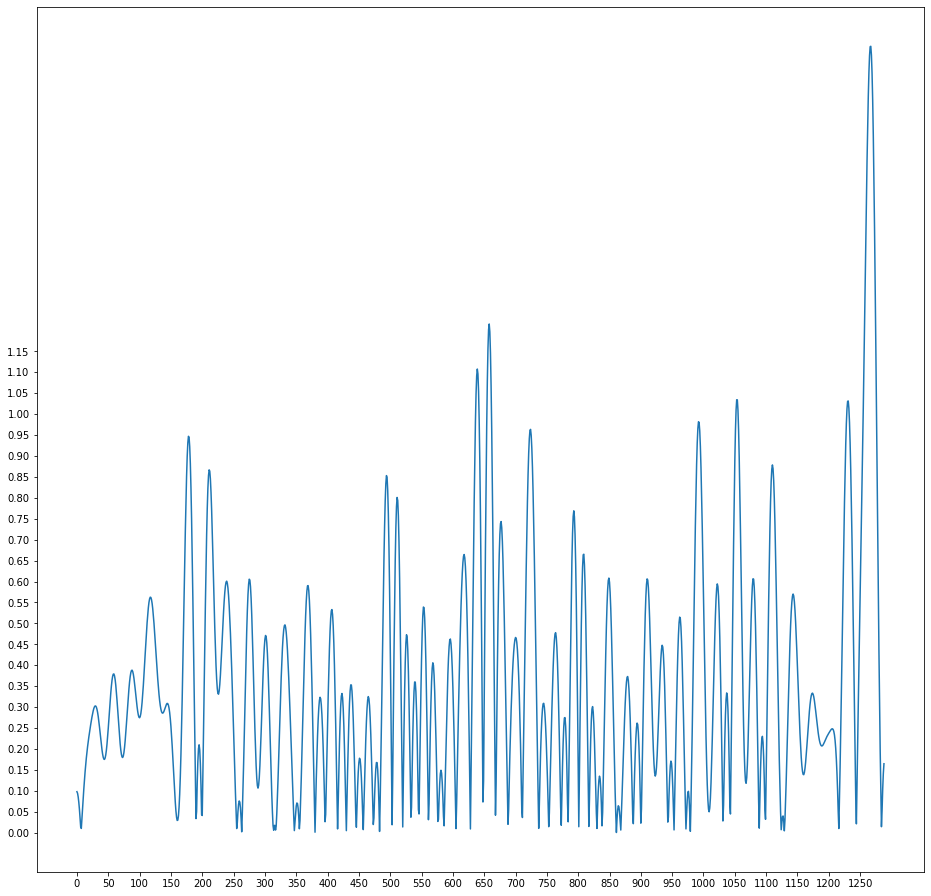

In [3]:
##Rendre la detection des peaks modulable###
##FindRefPeacksObj2 mOdulable###



video_path =  r"C:\Users\Nicolas\Desktop\Test_Hit\Mouse25_2020-02-07T11.15.51.avi"

HandleBEHAV = cv2.VideoCapture(video_path, 0)


length = int(HandleBEHAV.get(cv2.CAP_PROP_FRAME_COUNT))


_ , IMG1 = HandleBEHAV.read()


HandleBEHAV = cv2.VideoCapture(video_path, 0)
length = int(HandleBEHAV.get(cv2.CAP_PROP_FRAME_COUNT))

_ , IMG1 = HandleBEHAV.read()

linemask2= IMG1[601:602, : , 0]

linemask2 = np.invert(linemask2)
linemask2 = linemask2.flatten()

smoothmask = smooth(linemask2)

b, a = butter(8, 0.075)
smoothfiltered = filtfilt(b, a, smoothmask)

diffmask = np.diff(smoothfiltered,n=1)

PeaksNO2 , values = sig.find_peaks(diffmask, height = 0.01)

print(PeaksNO2)
list1 = []


if np.size(PeaksNO2) > 1: 

    var_Peaks = 1
    height = 0.01
    TakenHeight = []

    while np.size(PeaksNO2) > var_Peaks :
        height = height +0.01
        PeaksNO2_2 , values = sig.find_peaks(diffmask, height)
        print(height, PeaksNO2_2)
        
        if np.size(PeaksNO2_2) == 1:
            list1.append(PeaksNO2_2)
            TakenHeight.append(height)
            break
                
print("le peak = ",  list1 [0])
print("le treshold =",TakenHeight[0] )
print(TakenHeight)


Peaks3 = ((list1 [0])  - 15)
Peaks4 = ((list1 [0])  + 15)
    

print(Peaks3, Peaks4)



fig = plt.figure(figsize = (35,35))


plt.subplot(221), plt.plot(abs(diffmask))
plt.yticks( np.arange(0, 1.2, step=0.05))
plt.xticks( np.arange(0, 1280, step=50))

#plt.subplot(222), plt.plot(abs(smooth(np.asarray(ListObj1)-MeanPeaks)))

#plt.subplot(222), plt.plot(np.asarray(ListObj1))
#plt.xticks(range(0, 540, 20))
#plt.yticks(range(200, 500, 30))
#plt.grid(axis="x")

#plt.subplot(224), plt.plot(Listframe, Listpeaks, 'o')